### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E"> ML</p>

<a id="1.2"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Content</div>

<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-libraries" data-toc-modified-id="Loading-libraries-2"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading libraries</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-4"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data preprocessing</a></span></li><li><span><a href="#Prepare_samples_for_training_models" data-toc-modified-id="Prepare-samples-for-training-models-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Prepare samples for training models</a></span></li><li><span><a href="#Standardization" data-toc-modified-id="Standardization-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Standardization</a></span></li><li><span><a href="#Model-Training" data-toc-modified-id="Model-Training-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model Training</a></span></li><li><span><a href="#Model-comparison" data-toc-modified-id="Model-comparison-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model-comparison</a></span></li><li><span><a href="#Сomparison-of-theoretical,-experimental-and-predicted-data" data-toc-modified-id="Сomparison-of-theoretical,-experimental-and-predicted-data-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Сomparison of theoretical, experimental and predicted data</a></span></li>

<a id="Loading-libraries"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Loading libraries</div>

In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,accuracy_score
from tqdm import tqdm
from math import sqrt
from tabulate import tabulate

<a id="EDA"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> EDA</div>

In [2]:
data = pd.read_excel('fullerene_experiments.xlsx')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Concentration        48 non-null     float64
 1   Force                48 non-null     int64  
 2   Average temperature  48 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.2 KB


In [4]:
filename = 'd.json'
with open(filename) as f:
    r = json.load(f)

In [5]:
df = pd.DataFrame({'Temperature_gradient': r})

<a id="Data-preprocessing"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Data preprocessing</div>

In [6]:
data['Temperature_gradient'] = df['Temperature_gradient'] 

In [7]:
data['Average temperature'] = data['Average temperature'].astype('int')
data['Temperature_gradient'] = data['Temperature_gradient'].astype('int')

<a id="Prepare-samples-for-training-models"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Prepare samples for training models</div>

In [8]:
features = data.drop(['Average temperature', 'Temperature_gradient'], axis=1)
target = data['Average temperature'] 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    train_size = 0.67, 
                                                    random_state=42)

In [10]:
X_test

,Concentration,Force
27,1.0,72
40,1.8,112
26,0.9,200
43,1.9,112
24,0.9,72
37,1.6,112
12,0.5,72
19,0.7,112
4,0.2,112
25,0.9,112


<a id="Standardization"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Standardization</div>

In [11]:
ss = StandardScaler().fit(X_train)
columns = X_train.columns
X_train = pd.DataFrame(ss.transform(X_train), columns = columns)
X_test = pd.DataFrame(ss.transform(X_test), columns = columns)

<a id="
Model-Training"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> 
Model Training</div>

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">RandomForest</p>

In [12]:
best_model_rf = None
accuracy_RandomForest = 0
best_est = 0
best_depth = 0
for est in tqdm(range(10, 31, 10)):
    for depth in range (1, 51):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model.fit(X_train, y_train)
        predicted_valid_RF = model.predict(X_test)
        result_rf = accuracy_score(y_test, predicted_valid_RF) 
        if result_rf > accuracy_RandomForest:
            best_model_rf = model
            accuracy_RandomForest = result_rf
            best_est = est
            best_depth = depth


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.35it/s]


In [13]:
RMSE_RF = sqrt(mean_squared_error(y_test, predicted_valid_RF)) 

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">DecisionTree</p>

In [14]:
best_model_dt = None
accuracy_DecisionTree = 0
best_depths = 0
for depths in tqdm(range (1, 101)):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depths) 
    model.fit(X_train, y_train)
    predicted_valid_DT = model.predict(X_test) 
    result_dt = accuracy_score(y_test, predicted_valid_DT) 
    if result_dt > accuracy_DecisionTree:
        best_model_dt = model
        accuracy_DecisionTree = result_dt
        best_depths = depths

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 873.80it/s]

Accuracy лучшей модели: 0.6875 
Максимальная глубина: 4


In [15]:
RMSE_DT = sqrt(mean_squared_error(y_test, predicted_valid_DT)) 

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">Linear Regression</p>

In [16]:
%%time 
model = LinearRegression()
model.fit(X_train, y_train)
predicted_valid_LR = model.predict(X_test)

CPU times: user 2.36 ms, sys: 475 µs, total: 2.83 ms
Wall time: 2.68 ms


In [17]:
RMSE_LR = sqrt(mean_squared_error(y_test, predicted_valid_LR)) 

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">CatBoost</p>

In [18]:
cat = CatBoostRegressor(depth=10, iterations=300, learning_rate=0.15)
cat.fit(X_train, y_train)
predicted_valid_CAT = cat.predict(X_test)

0:	learn: 7.1924156	total: 56.9ms	remaining: 17s
1:	learn: 6.6622194	total: 57.1ms	remaining: 8.51s
2:	learn: 6.2165678	total: 57.1ms	remaining: 5.66s
3:	learn: 5.8131432	total: 57.3ms	remaining: 4.24s
4:	learn: 5.4244072	total: 57.5ms	remaining: 3.39s
5:	learn: 5.0958375	total: 57.7ms	remaining: 2.83s
6:	learn: 4.8677739	total: 57.9ms	remaining: 2.42s
7:	learn: 4.5534939	total: 58.1ms	remaining: 2.12s
8:	learn: 4.2696808	total: 58.2ms	remaining: 1.88s
9:	learn: 4.0295446	total: 58.5ms	remaining: 1.7s
10:	learn: 3.8023391	total: 58.8ms	remaining: 1.54s
11:	learn: 3.5892744	total: 59.1ms	remaining: 1.42s
12:	learn: 3.3710584	total: 59.4ms	remaining: 1.31s
13:	learn: 3.1545313	total: 59.4ms	remaining: 1.21s
14:	learn: 2.9733795	total: 59.7ms	remaining: 1.13s
15:	learn: 2.7964844	total: 60.1ms	remaining: 1.07s
16:	learn: 2.7200843	total: 60.2ms	remaining: 1s
17:	learn: 2.5500381	total: 60.2ms	remaining: 944ms
18:	learn: 2.4041785	total: 60.5ms	remaining: 894ms
19:	learn: 2.2703144	total: 

In [19]:
#calculate RMSE
RMSE_CAT = sqrt(mean_squared_error(y_test, predicted_valid_CAT)) 

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">XGBoost</p>

In [20]:
xgb = XGBRegressor(random_state=12345, learning_rate=0.1, max_depth=35)
xgb.fit(X_train, y_train)
predicted_valid_xgb = xgb.predict(X_test)

In [21]:
#calculate RMSE
RMSE_XGB = sqrt(mean_squared_error(y_test, predicted_valid_xgb)) 

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#294B8E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #294B8E">LightGBM</p>

In [22]:
ltgb = LGBMRegressor(learning_rate=0.3, max_depth=15)
ltgb.fit(X_train, y_train)
predicted_valid_ltgb = ltgb.predict(X_test)

In [23]:
#calculate RMSE
RMSE_LGBM = sqrt(mean_squared_error(y_test, predicted_valid_ltgb)) 

<a id="Model-comparison"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Model comparison</div>

In [24]:
data_RMSE={'Models':['XGBoost','LightGBM','CatBoost', 'Decision Tree', 'Random Forest','Linear Regresion'],
     'RMSE': [RMSE_XGB, RMSE_LGBM, RMSE_CAT, RMSE_DT, RMSE_RF, RMSE_LR]}
df_RMSE=pd.DataFrame(data_RMSE)
print(tabulate(df_RMSE, headers='keys', tablefmt='psql'))

+----+------------------+----------+
|    | Models           |     RMSE |
|----+------------------+----------|
|  0 | XGBoost          | 1.19921  |
|  1 | LightGBM         | 5.84509  |
|  2 | CatBoost         | 0.851235 |
|  3 | Decision Tree    | 1.14564  |
|  4 | Random Forest    | 1.14564  |
|  5 | Linear Regresion | 3.36452  |
+----+------------------+----------+


<a id="Сomparison-of-theoretical,-experimental-and-predicted-data"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Сomparison of theoretical, experimental and predicted data</div>

In [25]:
y_test = np.array(y_test)

array([19, 21, 27, 21, 20, 21, 21, 23, 24, 23, 42, 22, 22, 19, 19, 24])

In [27]:
grad = []
for i in [27, 40, 26, 43, 24, 37, 12, 19, 4, 25, 8, 3, 6, 39, 33, 13]:
    grad.append(data.iloc[i,[3]])
grad = [8, 9, 26, 8, 9, 10, 12, 16, 26, 14, 41, 16, 15, 6, 7, 19]

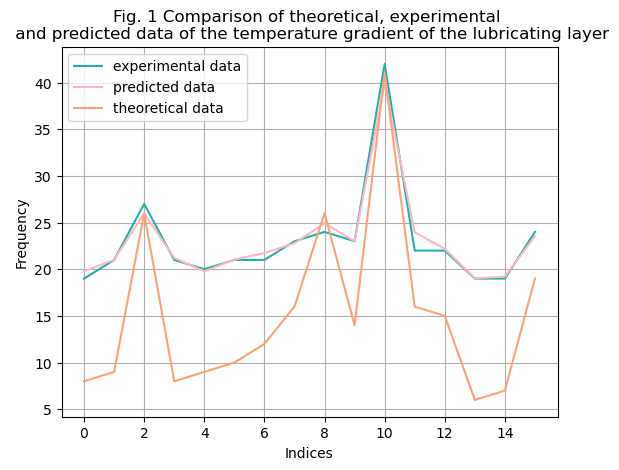

In [29]:
plt.plot(y_test, label='experimental data', color='lightseagreen')
plt.plot(predicted_valid_CAT, label='predicted data', color='lightpink');
plt.plot(grad, label='theoretical data', color='lightsalmon');
plt.title('Fig. 1 Comparison of theoretical, experimental \n and predicted data of the temperature gradient of the lubricating layer')
plt.xlabel('Indices')
plt.ylabel('Frequency')
plt.grid();
plt.legend();
plt.savefig('images/comparation.png')